# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## Hoja  de trabajo 2
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*movies.csv*". A continuación se muestran los resultados: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from typing import *
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
dataframe: pd.DataFrame = pd.read_csv("movies.csv",  encoding='ISO-8859-1')
rows_to_correct = dataframe[dataframe['actorsCharacter'].astype(str) == dataframe['id'].astype(str)]

# Realiza la corrección de valores
dataframe.loc[rows_to_correct.index, 'director'] = ''
dataframe.loc[rows_to_correct.index, 'actors'] = rows_to_correct['director']
dataframe.loc[rows_to_correct.index, 'actorsPopularity'] = rows_to_correct['actors']
dataframe.loc[rows_to_correct.index, 'actorsCharacter'] = rows_to_correct['actorsPopularity']

rows_to_correct = dataframe[dataframe['actorsPopularity'].astype(str) == 'TRUE']
dataframe.loc[rows_to_correct.index, 'actorsPopularity'] = rows_to_correct['video']
dataframe.loc[rows_to_correct.index, 'video'] = rows_to_correct['actors']

rows_to_correct = dataframe[dataframe['actorsPopularity'].astype(str) == 'FALSE']
dataframe.loc[rows_to_correct.index, 'actorsPopularity'] = rows_to_correct['video']
dataframe.loc[rows_to_correct.index, 'video'] = rows_to_correct['actors']


dataframe['castWomenAmount'] = pd.to_numeric(dataframe['castWomenAmount'], errors='coerce')
dataframe['castMenAmount'] = pd.to_numeric(dataframe['castMenAmount'], errors='coerce')

dataframeTo = dataframe.drop('id', axis=1)

dataframeTo.describe()

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9963.000000,9838.000000
mean,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600,7004.157784,16557.193434
std,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802,67239.619658,100455.960117
min,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000,3.000000,7.000000
50%,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000
75%,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000,10.000000,20.000000
max,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000


In [4]:
# Dividir los valores y convertir a listas
dataframe = dataframe.assign(actorsPopularityStrArray=dataframe['actorsPopularity'].str.split('|', expand=False))
dataframe = dataframe.assign(genresArray=dataframe['genres'].str.split('|', expand=False))

def obtainPrincipal(x):
    if isinstance(x, list):
        return x[0]
    else:
        return ''

dataframe = dataframe.assign(principalGenre=dataframe['genresArray'].apply(lambda x: obtainPrincipal(x) if x is not None else ''))

def convert_to_numeric(lst):
    if lst:
        if isinstance(lst, list):
            return [float(value) for value in lst]
        else:
            return [float(lst)]
    else:
        return []


dataframe = dataframe.assign(actorsPopularityNumArray=dataframe['actorsPopularityStrArray'].apply(lambda x: convert_to_numeric(x) if x is not None else x))

dataframe = dataframe.assign(actorsMostPopularity= dataframe['actorsPopularityNumArray'].apply(lambda x: max(x)))
dataframe = dataframe.assign(actorsWorstPopularity= dataframe['actorsPopularityNumArray'].apply(lambda x: min(x)))
dataframe = dataframe.assign(actorsPopularityMean= dataframe['actorsPopularityNumArray'].apply(lambda x: np.mean(x)))
dataframe = dataframe.assign(actorsPopularityMedian= dataframe['actorsPopularityNumArray'].apply(lambda x: np.median(x)))

dataframe = dataframe[['popularity',
                    'actorsMostPopularity', 
                    'actorsWorstPopularity', 
                    'actorsPopularityMean',
                    'actorsPopularityMedian']]

#dataframe = dataframe[dataframe['principalGenre'] != '']

dataframe

,popularity,actorsMostPopularity,actorsWorstPopularity,actorsPopularityMean,actorsPopularityMedian
0,20.880,27.973,0.6,11.580640,7.9060
1,9.596,18.295,0.6,6.476200,4.3690
2,100.003,24.542,0.6,2.135924,0.9910
3,134.435,33.379,0.6,8.139208,8.3395
4,58.751,33.297,0.6,3.654921,1.6115
...,...,...,...,...,...
9995,16.662,18.185,0.6,2.678400,0.6000
9996,491.706,1.550,0.6,0.748750,0.6000
9997,565.658,1.400,0.6,0.730706,0.6000
9998,9.664,NaN,NaN,NaN,NaN


Tras realizar un preprocesamiento del dataset proporcionado por el archivo "*movies.csv*" se procedió a clasificar las variables para determinar y segmentar las que puedan proporcionar un grupo de interés de estudio. La variables identificadas son:

- Id: Cualitativa Ordinal
- popularity: Cuantitativa Discreta
- budget: Cuantitativa Discreta
- revenue: Cuantitativa Discreta
- original_title: Cualitativa Nominal
- originalLanguage: Cualitativa Nominal
- title: Cualitativa Nominal
- homePage: Cualitativa Nominal
- video: Cualitativa Nominal
- director: Cualitativa Nominal
- runtime: Cuantitativa Continua
- genres: Cualitativa Nominal
- genresAmount: Cuantitativa Discreta
- productionCompany: Cualitativa Nominal
- productionCoAmount: Cuantitativa Discreta
- productionCompanyCountry: Cualitativa Nominal
- productionCountry: Cualitativa Nominal
- productionCountriesAmount: Cuantitativa Contable
- releaseDate: Cualitativa Ordinal
- voteCount: Cuantitativa Contable
- voteAvg: Cuantitativo Contable
- actors: Cualitativo Nominal
- actorsPopularity: Cuantitativa Discreta
- actorsCharacter: Cualitativa Nominal
- actorsAmount: Cuantitativa Discreta
- castWomenAmount: Cuantitativa Discreta
- castMenAmount: Cuantitativa Discreta

Posteriormente se filtraron las variables a las que se les puede realizar el proceso de clustering. Las variables son:
- popularity: Cuantitativa Discreta
- budget: Cuantitativa Discreta
- revenue: Cuantitativa Discreta
- runtime: Cuantitativa Continua
- genresAmount: Cuantitativa Discreta
- productionCoAmount: Cuantitativa Discreta
- productionCountriesAmount: Cuantitativa Contable
- actorsPopularity: Cuantitativa Discreta
- actorsAmount: Cuantitativa Discreta
- castWomenAmount: Cuantitativa Discreta
- castMenAmount: Cuantitativa Discreta

En el preprocesamiento se procedió a realizar una estandarización de los datos para garantizar que tengan una media de cero y una desviación estándar de 1. Además, se eliminaron las filas que contienen valores nulos.

In [5]:
scaler = sklearn.preprocessing.StandardScaler()
random.seed(123)

dataScale = scaler.fit_transform(dataframe.dropna())

# Convierte los datos escalados de nuevo a un DataFrame
scaled_df = pd.DataFrame(dataScale, columns=dataframe.columns)

X = np.array(dataframe.dropna())
X.shape

(9912, 5)

## Estadístico de Hopkings
Porteriormente con los datos escalados, se procedió a calcular el índice de Hopkings para medir la agrupabilidad del conjunto de datos. En este caso, el índice de Hopkins resultante fué de 0.005371702614338374 y dado que el valor es cercano a 0, indica una alta probabilidad de que los datos sean agrupables. 

In [6]:
pyclustertend.hopkins(X, len(X))

0.005442565626203713

## VAT (Visual Assessment of Cluster Tendency)
También se procedió a realizar la VAT sobre el conjunto de datos seleccionados y se determinó que mediante este método no se pueden identificar la cantidad de clusters para el conjunto de datos seleccionados.

In [7]:
pyclustertend.vat(scaled_df)

## K-means
De esta manera, se decidió aplicar otros métodos para  encontrar patrones en los datos. En este caso, se utiliza un algoritmo de clasificacion llamado K-means. Esta es una forma de medir y observar la clasificacion de los datos en clusters.

### Gráfico de codo
Para tener una representación visual de los resultados obtenidos, se realizó una gráfica de codo. La gráfica resultante indica que el número de clusters para nuestro conjunto de datos es un "*k = 5*".

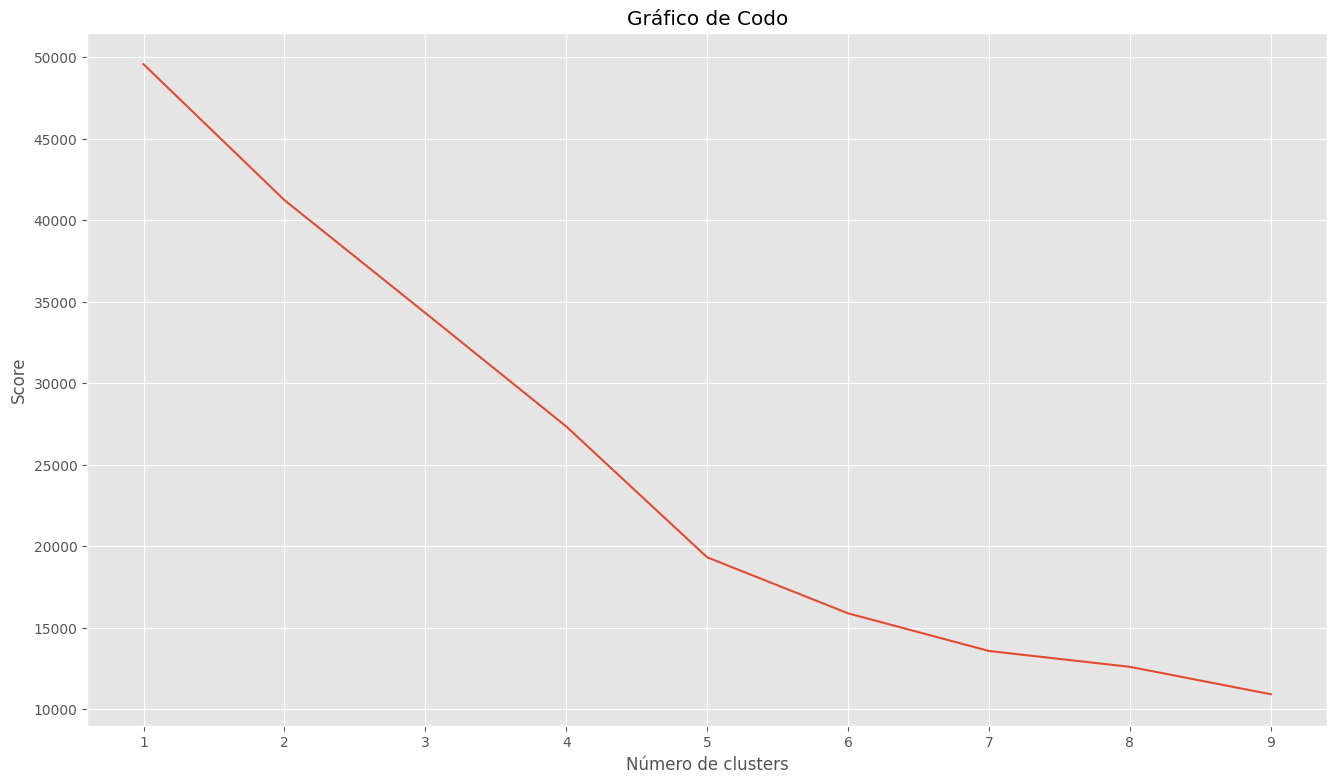

[49560.000000000015, 41223.76261026973, 34300.68381799835, 27339.25185264433, 19310.5556247905, 15875.808422565075, 13565.712166487185, 12592.124361633147, 10913.248482122062]


In [ ]:
numeroClusters = range(1,10)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dataScale)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()
print(wcss)

## Silhouettes
Al determinar el *k* número de grupos, se procedió a utilizar el coeficiente de la silueta para evaluar la coherencia de los clusters en el conjunto de datos seleccionados.  

Se calculó para "*k = 2,3,4,5,6 y 7*" y los resultados son los siguientes: 

- k = 2: El promedio del valor de la silueta es de 0.9893 indicando que la asignación de los datos para ambos clusters es bastante coherente y existe una clara separación entre los clusters. 
- k = 3: El promedio del valor de la silueta es de 0.9253. En este caso, esto sugiere que la asignación de datos en 3 clusters es bastante coherente también, pero podría llegar a existir una ligera superposición.
- k = 4: El promedio del valor de la silueta es de 0.9230. Esta es una asignación que sigue siendo coherente pero que tiene una menor separación que tres clusters.
- k = 5: El promedio del valor de la silueta es de  0.8890. Este valor nos indica que la asignación a 5 clusters tiene una coeherencia ligeramente menor que los casos anteriores y podría llegar a existir suposición o confusión entre algunos clusters.
- k = 6 y 7: El promedio del valor de la silueta es de 0.7595 y 0.7103 respectivamente, sugiriendo una disminución en la coherencia y separación a medida que se aumenta el número de clusters. 

For n_clusters = 2 The average silhouette_score is : 0.9893297795563968
For n_clusters = 3 The average silhouette_score is : 0.9252682221852271
For n_clusters = 4 The average silhouette_score is : 0.9229895289592553
For n_clusters = 5 The average silhouette_score is : 0.8890263803730559
For n_clusters = 6 The average silhouette_score is : 0.7594786279895857
For n_clusters = 7 The average silhouette_score is : 0.7103387092372305


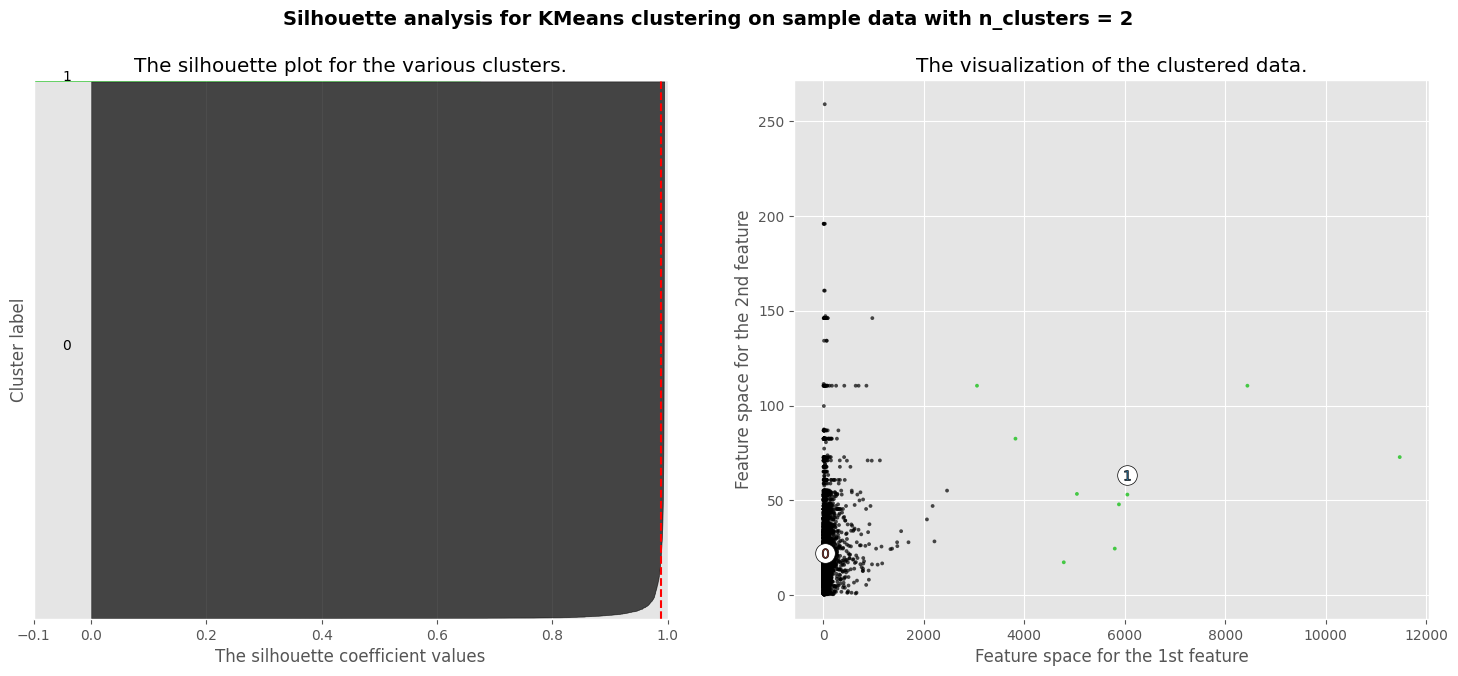

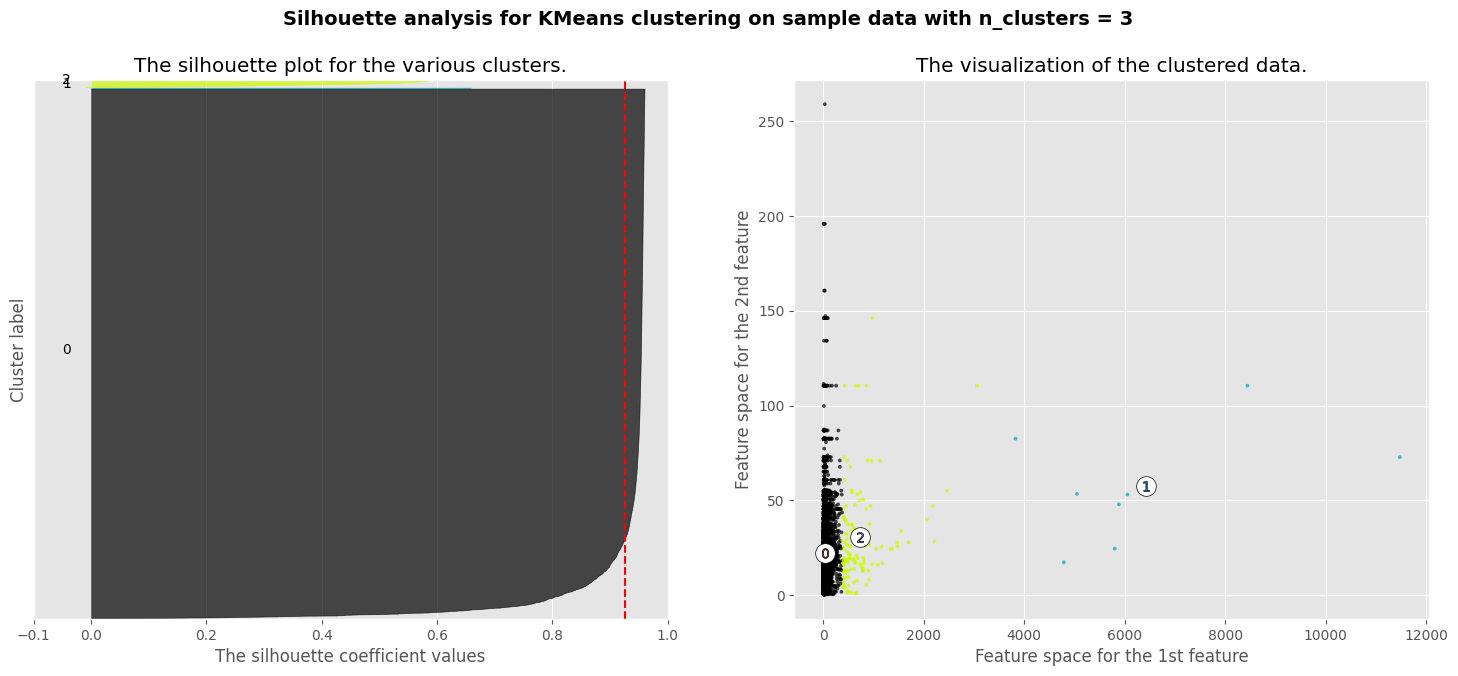

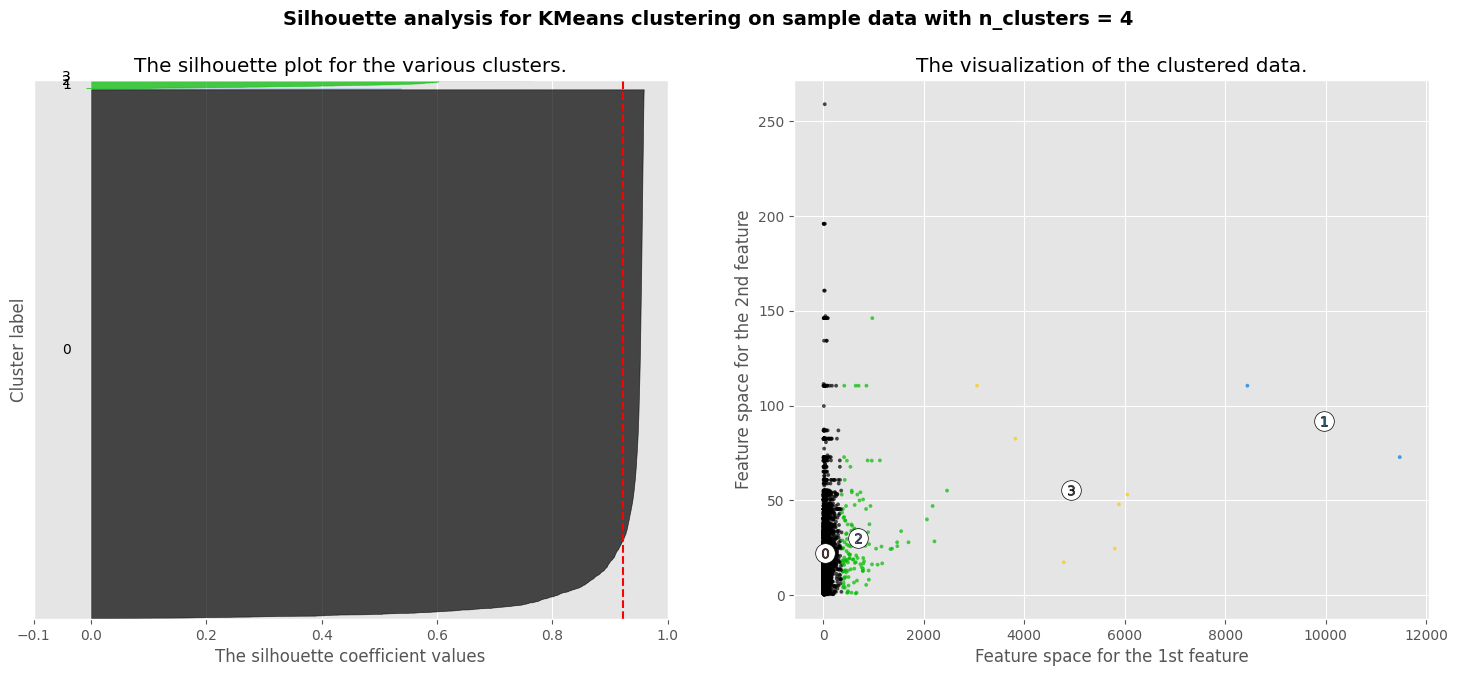

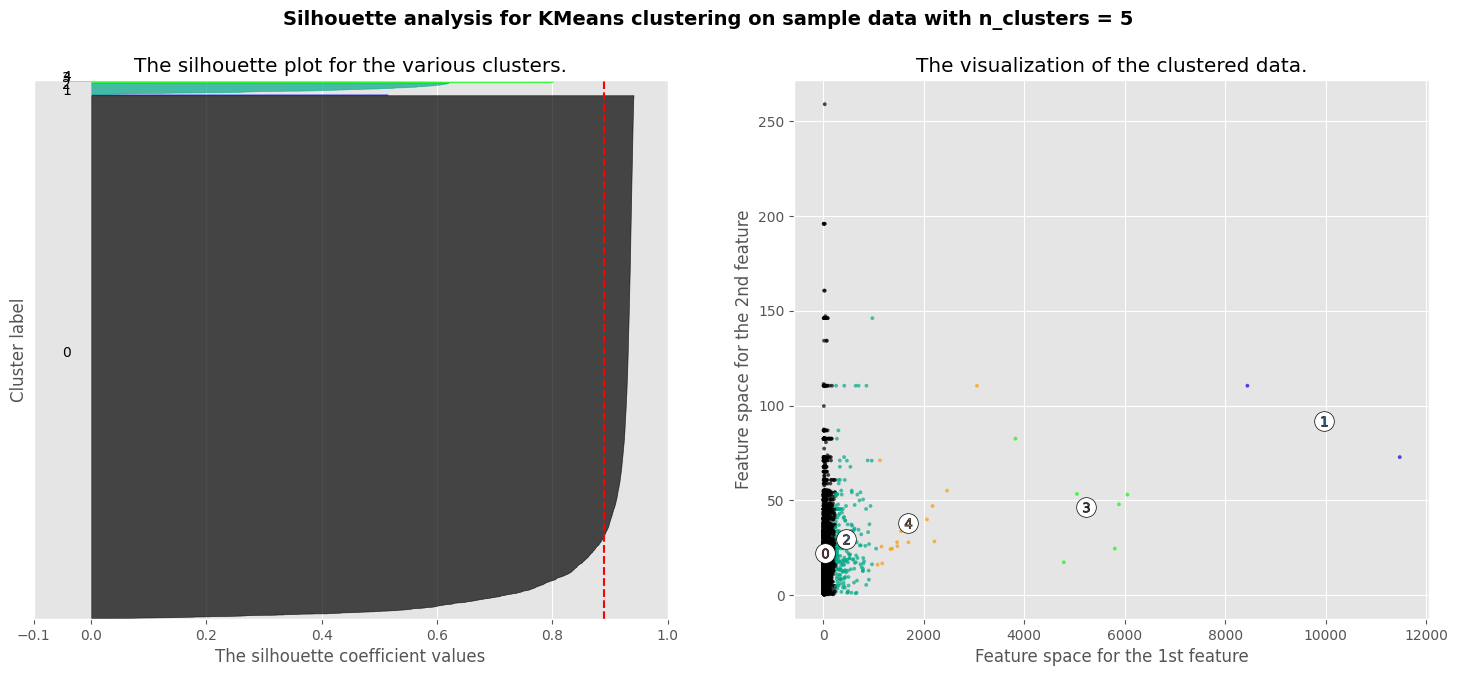

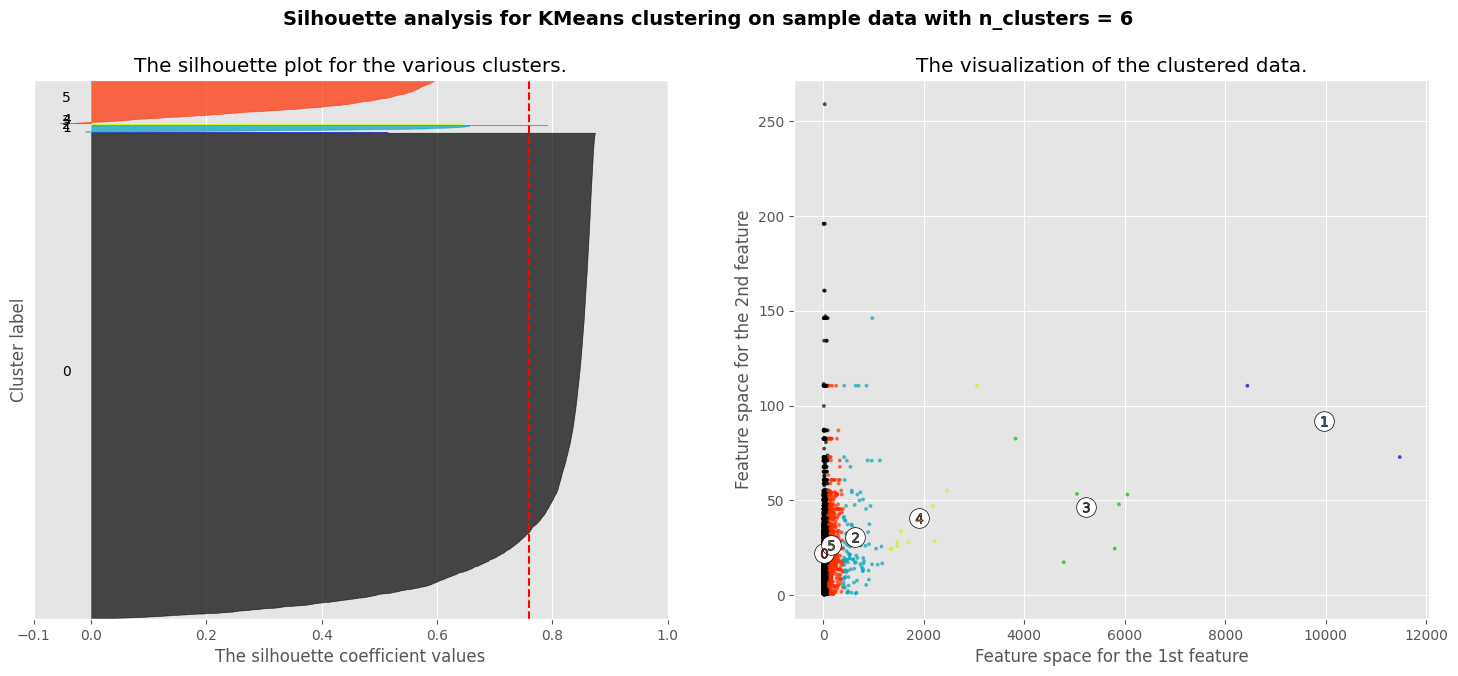

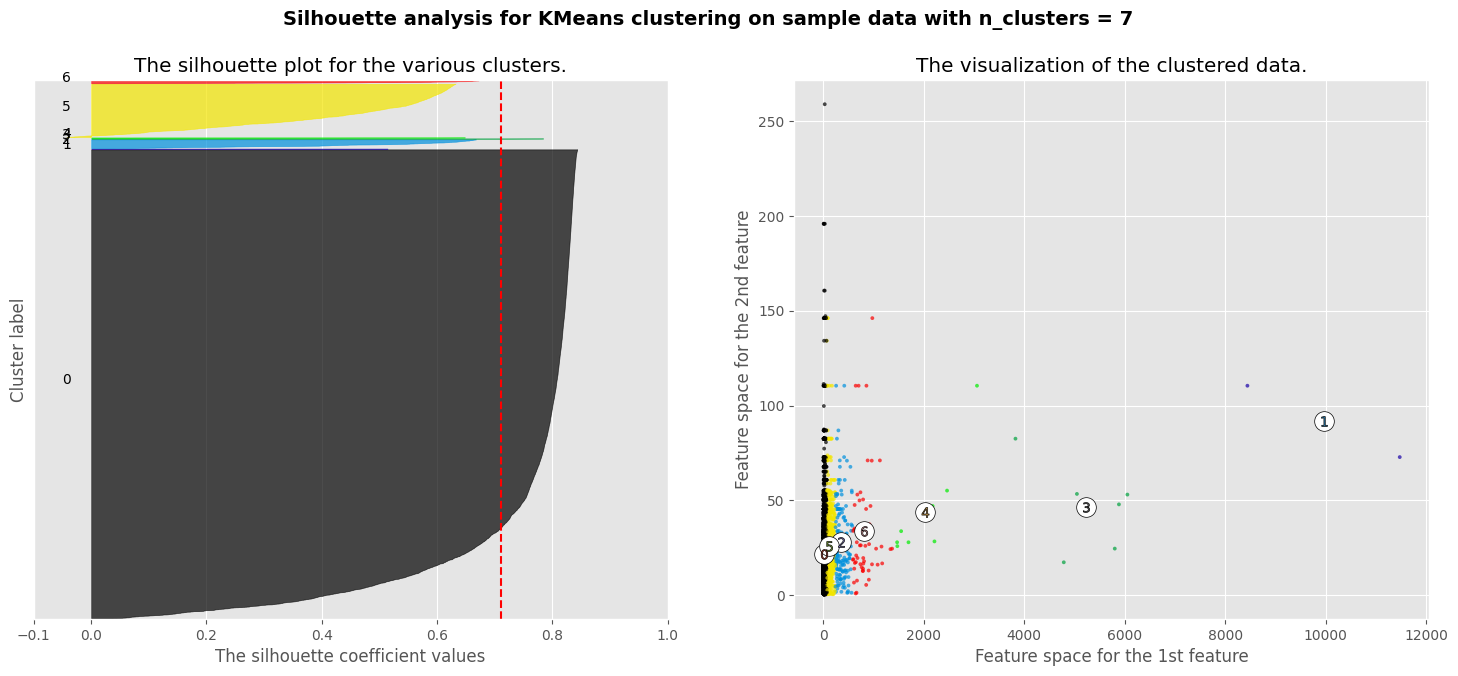

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

De esto se determina que un valor entre k = 4 y 5 tienen valores aceptables para realizar el agrupamiento.

### Metricas en el grafico de codo

- Distorión: Para el primer gráfico se aplicó la métrica de distorsión, donde nos dice que el número óptimo de clusters sería de 5. Podemos ver igualmente que el valor de distorisón (36,797,890.013) es bastante alto, lo que indica que hay una alta variabilidad dentro de los clusters.
- Silueta: Este segundo gráfico se aplicó la métrica de silueta, donde nos indica que el número óptimo de clusters sería de 2. Se puede ver igualmente que la puntuación de la silueta (0.989) es alto, lo que indica que los clusters están bien definidos y separados entre sí.
- Calinski-Harabasz: Este último gráfico se le aplicó la métrica de Calinski-Harabaz, donde nos dice al igual que el segundo gráfico que el número óptimo de clusters sería de 2. El índice de Calinski-Harabasz calcula la relación entre la dispersión intra-cluster y la dispersión inter-cluster. En este caso el índice es bastante alto (21,617.073), lo que nos indica que los clusters son más densos y bien sepaeados entre sí, por lo que igual al gráfico anterior los clusters estarían bastante compactos y separados entre sí.

En base a estos resultados propuestos se puede concluir que sería más óptimo utilizar un k = 2 en lugar de un número mayor de clusters, para que estos esten mucho más compactos, definidos y separados entre ellos.

In [ ]:
# get it from https://towardsdatascience.com/elbows-and-silhouettes-hands-on-customer-segmentation-in-python-66c2e794c552
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from kmodes.kprototypes import KPrototypes
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kneed import KneeLocator
from sklearn.decomposition import PCA
from tqdm import tqdm
import sys
import warnings

warnings.filterwarnings("ignore")
nK = 12   
RNDN = 55   
def elbowplot(df, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2,nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  
    
model = KMeans(random_state=RNDN)
_ = [elbowplot(X, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]  

  0%|          | 0/3 [00:00<?, ?it/s]

NameError: name 'X' is not defined

## Por lo visto anteriormente puede que k=2 sea incluso mejor para los datos en otros aspectos.
Pero para lo que se requiere, se plantea mejor ir por un valor que se encuentre entre los optimos en los 3 aspectos que seria 

k=3

In [ ]:
km = cluster.KMeans(n_clusters=3).fit(X)
print (km)

KMeans(n_clusters=4)


In [ ]:
centroides = km.cluster_centers_
print(centroides)

[[7.29097595e+02 3.07476111e+01 8.21650794e-01 6.18183110e+00
  3.74728968e+00]
 [6.41689387e+03 5.78093750e+01 9.13750000e-01 1.04896822e+01
  5.72625000e+00]
 [3.75184483e+01 2.24778928e+01 8.08529045e-01 5.27122068e+00
  3.29049514e+00]]


In [ ]:
popularities = km.predict(X)

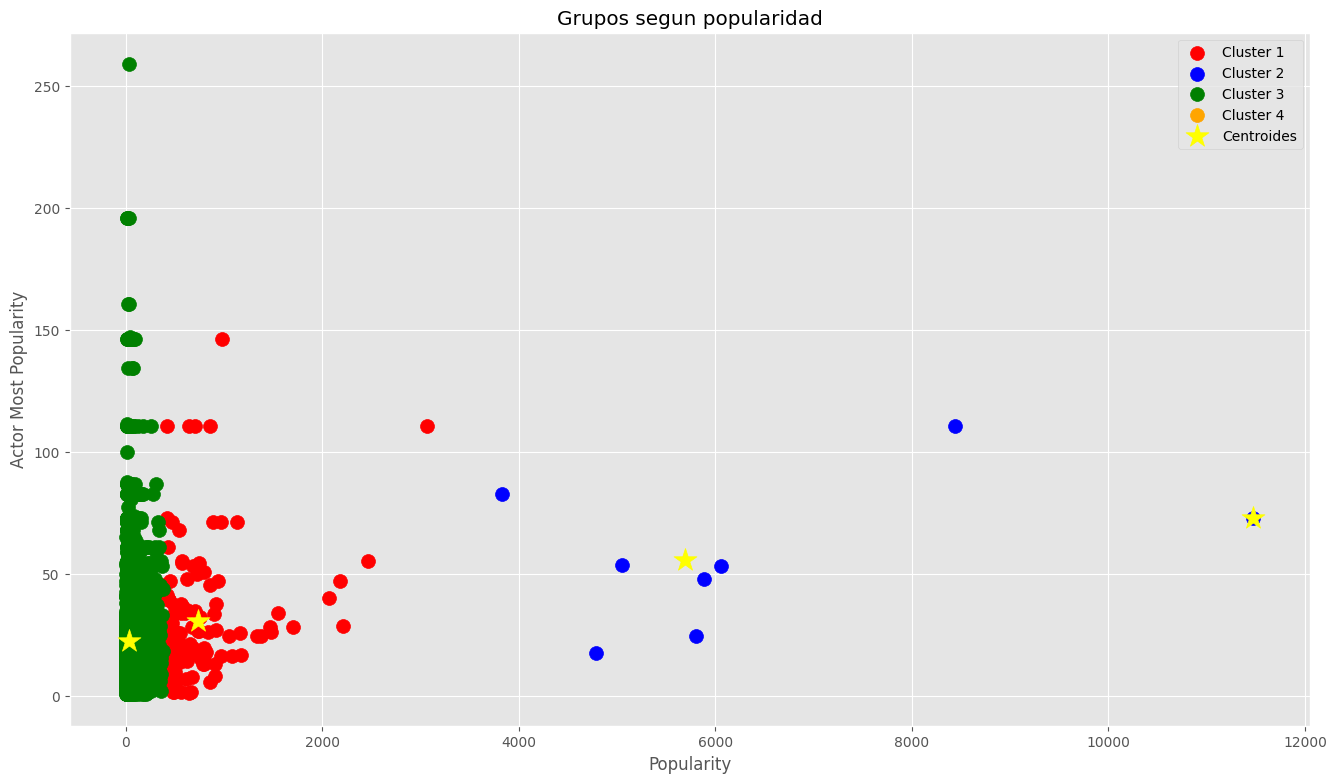

In [ ]:
plt.scatter(X[popularities == 0, 0], X[popularities == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[popularities == 1, 0], X[popularities == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[popularities == 2, 0], X[popularities == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(X[popularities == 3, 0], X[popularities == 3, 1],s=100,c='orange', label = "Cluster 4")
#plt.scatter(X[popularities == 4, 0], X[popularities == 4, 1],s=100,c='black', label = "Cluster 5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Grupos segun popularidad")
plt.xlabel("Popularity")
plt.ylabel("Actor Most Popularity")
plt.legend()